# Get meteo data #

In [ ]:
import os
from pycequeau import physiographic, meteo, core
import matplotlib.pyplot as plt

In [ ]:
project_folder = r"path/to/your/project/"
files_list = ["BurnedDEM.tif", # DEM tif file
                "FAC.tif", #Flow accumulation tif file
                "LCF.tif", # Land conver tif file
                "Watershed.tif", # Watershed tif file
                "CAT.tif" #Sub basins tif file
                ]
# 2- Create
bassinVersant_file = os.path.join(project_folder,
                                    "results",
                                    "bassinVersant.json")
# 4- Create basin Object:
basin = physiographic.Basin(project_folder,
                "Margarite",
                files_list,
                bassinVersant_file)
# 5- Create the Meteo data object
MeteoStations = meteo.meteo_netcdf.StationNetCDF.charge_ERA_Meteo(basin,
                                                os.path.join(project_folder,"meteo","ERA"))
# 6- Do the interpolation
MeteoStations.ds = core.netcdf.intermidiate_interpolation(MeteoStations.ds,10)
dsi = MeteoStations.interpolation("nearest")
# 7- Construct the meteo structure for CEQUEAU
grid_CEQUEAU = MeteoStations.cequeau_grid(dsi,basin)
# 8- Save the netcdf with the meteo data
grid_CEQUEAU.to_netcdf(os.path.join(project_folder,"meteo","meteo_cequeau.nc"))

In [3]:
dsi

<xarray.Dataset> Size: 1GB
Dimensions:          (time: 15341, j: 40, i: 50)
Coordinates:
  * time             (time) datetime64[ns] 123kB 1979-01-01 ... 2020-12-31
  * j                (j) int16 80B 49 48 47 46 45 44 43 ... 16 15 14 13 12 11 10
  * i                (i) int16 100B 10 11 12 13 14 15 16 ... 54 55 56 57 58 59
Data variables:
    longwaveRad      (time, j, i) float32 123MB nan nan nan nan ... nan nan nan
    surfacePressure  (time, j, i) float32 123MB nan nan nan nan ... nan nan nan
    rayonnement      (time, j, i) float64 245MB nan nan nan nan ... nan nan nan
    nebulosite       (time, j, i) float32 123MB nan nan nan nan ... nan nan nan
    tMax             (time, j, i) float32 123MB nan nan nan nan ... nan nan nan
    tMin             (time, j, i) float32 123MB nan nan nan nan ... nan nan nan
    pTot             (time, j, i) float32 123MB nan nan nan nan ... nan nan nan
    pression         (time, j, i) float32 123MB nan nan nan nan ... nan nan nan
    vitesseVent      (time, j, i) float32 123MB nan nan nan nan ... nan nan nan
    CE               (j, i) float16 4kB nan nan nan nan nan ... nan nan nan nan
Attributes:
    interpolated:  Interpolated using the method: nearest from xr.Dataset.int...

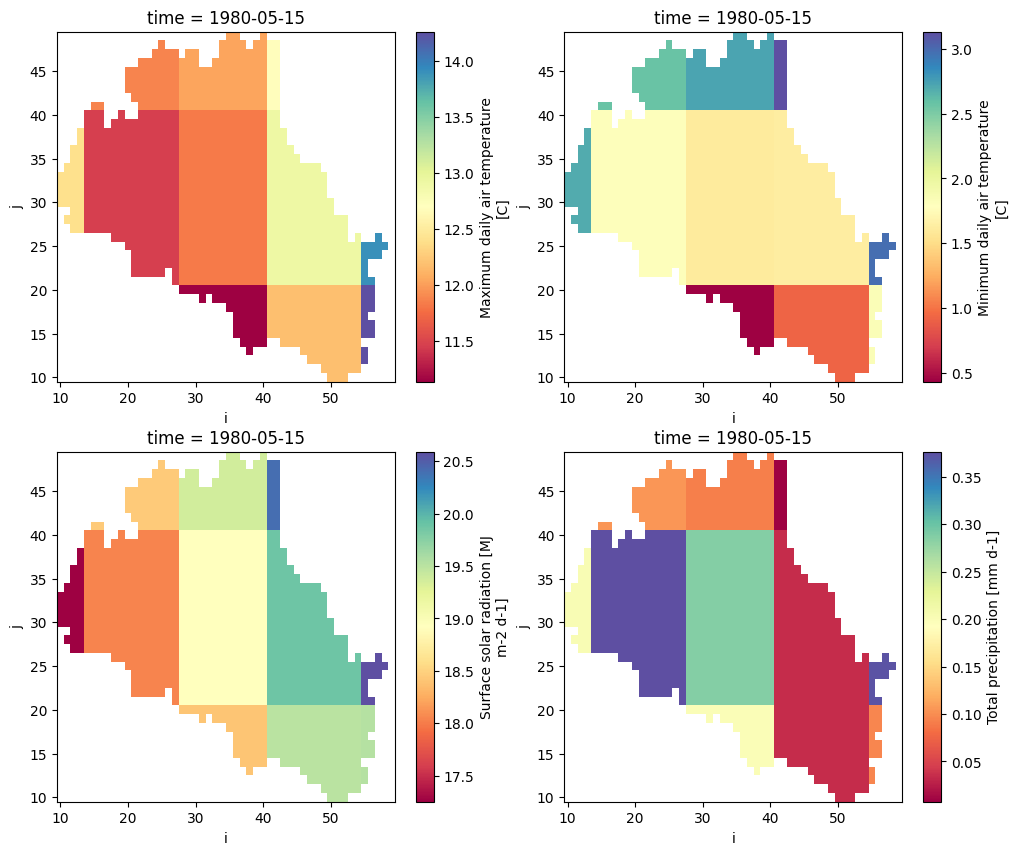

In [10]:
dsi = dsi.isel(time=500)
fig, axes = plt.subplots(ncols=2,
                        nrows=2,
                        figsize=(12, 10))
dsi["tMax"].plot(ax=axes[0,0], cmap='Spectral')
# axes[0].set_title("Raw data")
dsi["tMin"].plot(ax=axes[0,1], cmap='Spectral')
dsi["rayonnement"].plot(ax=axes[1,0], cmap='Spectral')
# axes[0].set_title("Raw data")
dsi["pTot"].plot(ax=axes[1,1], cmap='Spectral')